In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix

#Python File Funtions
from clean_and_split import clean_columns, split_data
from models import logistic_model, cross_validation_log, naive_bayes, cross_validation_bayes


%matplotlib inline

# Potential Loan Customers Modelling

### Part 2: Modelling 

There will be a final exploration of data before modelling. Please see clean_and_split.py for cleaning and splitting functions. The dataset was taken from kaggle, so the only cleaning of data that was done, was dropping and reformatting column names. 

In [2]:
df = clean_columns()

In [3]:
df.head(3)

,income,cc_avg,mortgage,personal_loan,cd_account
0,49,1.6,0,0,0
1,34,1.5,0,0,0
2,11,1.0,0,0,0


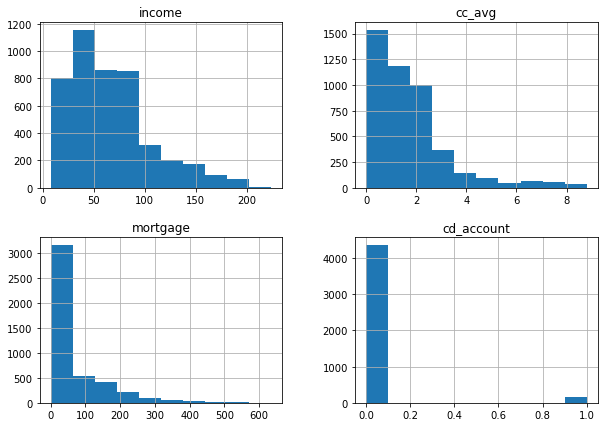

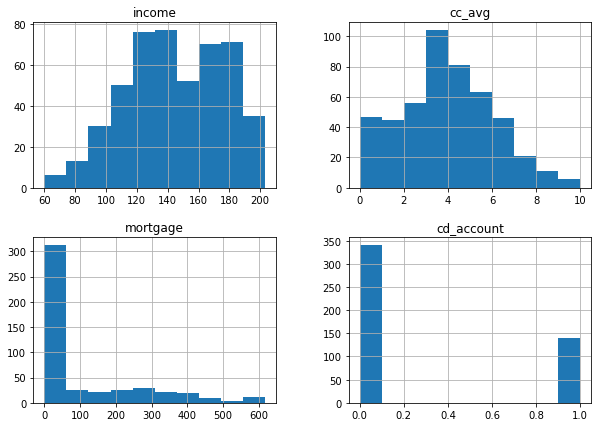

In [4]:
df.groupby("personal_loan").hist(figsize=(10,7));

Above shows the histograms for all data being used for modelling. The top 4 plots are for customers who declined the loan offer and the bottom 4 are for those who accepted.
As stated in part 1, it's clear from the distributions that income and cc_avg seem like the most important featues. Income and CC Avg for the no-loan group, both have right-skewed distributions and the loan group has more of a normal distribution for CC Avg and more left-skewed for income.

Part 1 explained that mortgages contained a lot of customers without mortgages, so this will impact the modelling and results quite significantly.

I'll start the modelling using income and cc_avg for features. The model can then be assessed and if needed, more features can be added depending on accuracy. 



In [5]:
x_train, x_test, y_train, y_test = split_data(df, ["income", "cc_avg"])

In [6]:
y_train.value_counts()

0    3606
1     394
Name: personal_loan, dtype: int64

As seen in part 1, there is a pretty small amount of data for those customers who accepted. After modelling, I will further test the model using cross-validation.

In [7]:
log_result = logistic_model(x_train, x_test, y_train, y_test)
print("Logistic Regression Accuracy For 2 Features: {}%".format((log_result[0]*100).round(2)))

Logistic Regression Accuracy For 2 Features: 91.8%


In [8]:
x_train_all, x_test_all, y_train_all, y_test_all = split_data(df, ["income", "cc_avg", "mortgage", "cd_account"])

In [9]:
log_result_all = logistic_model(x_train_all, x_test_all, y_train_all, y_test_all)
print("Logistic Regression Accuracy For All 4 Features: {}%".format((log_result_all[0]*100).round(2)))

Logistic Regression Accuracy For All 4 Features: 92.8%


The results above show that there was an accuracy increase when all X features were used in the model. I'll now use cross validation to check the models accuracy.

In [10]:
cross_val = cross_validation_log(df, ["income", "cc_avg"])
print("Cross Validation accuracy For 2 Features: {}%".format((cross_val*100).round(2)))

Cross Validation accuracy For 2 Features: 90.74%


In [11]:
cross_val_all = cross_validation_log(df, ["income", "cc_avg", "mortgage", "cd_account"])
print("Cross Validation accuracy For 4 Features: {}%".format((cross_val_all*100),round(2)))

Cross Validation accuracy For 4 Features: 91.92%


In [12]:
cross_val_3 = cross_validation_log(df, ["income", "cc_avg", "cd_account"])
print("Cross Validation accuracy For 3 Features: {}%".format((cross_val_all*100),round(2)))

Cross Validation accuracy For 3 Features: 91.92%


The cross-validation results for both came back to similar accuracy to the other results. The accuracy stayed the same when mortgage feature got excluded. This is most likely due to the considerable amount of 0 values, many customers not having mortgages. 
The overall accuracy could be because of the lack of data for personal loan customers. There was only 120 cases in the test data, so where the inaccuracy is coming from may need to be explored. In this case, we would prefer false positives than false negatives. From a markerting point of view, it will be more costly to miss out sending promotions to those customers who are likely to accept, than it would be to send the promotion to those unlikely to accept.

In [13]:
bayes_results = naive_bayes(x_train, x_test, y_train, y_test)
print("Naive Bayes Accuracy For 2 Features: {}%".format((bayes_results[0]*100).round(2)))

Naive Bayes Accuracy For 2 Features: 90.8%


In [14]:
bayes_results_all = naive_bayes(x_train_all, x_test_all, y_train_all, y_test_all)
print("Naive Bayes Accuracy For 4 Features: {}%".format((bayes_results_all[0]*100).round(2)))

Naive Bayes Accuracy For 4 Features: 88.5%


In [15]:
cross_val_bayes = cross_validation_bayes(df, ["income", "cc_avg"])
print("Cross Validation (Bayes) accuracy For 2 Features: {}%".format((cross_val_bayes*100).round(2)))

Cross Validation (Bayes) accuracy For 2 Features: 89.04%


In [16]:
cross_val_bayes_all = cross_validation_bayes(df, ["income", "cc_avg", "mortgage", "cd_account"])
print("Cross Validation (Bayes) accuracy For 4 Features: {}%".format((cross_val_bayes_all*100),round(2)))

Cross Validation (Bayes) accuracy For 4 Features: 87.72%


In [17]:
cross_val_bayes_all = cross_validation_bayes(df, ["income", "cc_avg", "cd_account"])
print("Cross Validation (Bayes) accuracy For 3 Features: {}%".format((cross_val_bayes_all*100),round(2)))

Cross Validation (Bayes) accuracy For 3 Features: 87.94000000000001%


Bayes model is performing slightly worse than logistic regression. The cross validation scores are showing similar to the normal model results which means the model isn't overfitting, but is performing considerable amount better with less features. There was a slight improvement when the mortgage feature got excluded from the model in Bayes.

I'll now look into the model accuracies more. We don't want to miss out on potential customers and the test data didn't contain many loan customers.

In [18]:
log_matrix = log_result_all[1]
print(log_matrix)

[[889  19]
 [ 53  39]]


In [40]:
log_prec_score = log_result_all[2]
print("Logstic precision score: {}%".format((log_prec_score*100).round(2)))

Logstic precision score: 67.24%


In [24]:
log_matrix_2_featues = log_result[1]
print(log_matrix_2_featues)

[[890  24]
 [ 58  28]]


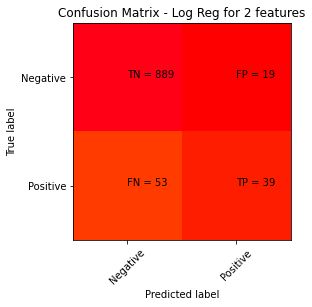

In [39]:
plt.clf()
plt.imshow(log_matrix, interpolation='nearest', cmap=plt.cm.hsv)
classNames = ['Negative','Positive']
plt.title('Confusion Matrix - Log Reg for 2 features')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(log_matrix[i][j]))
plt.show()

In [45]:
log_prec_score_2_features = log_result[2]
print("Logstic precision score 2 features: {}%".format((log_prec_score_2_features*100).round(2)))

Logstic precision score 2 features: 53.85%


In [21]:
bayes_matrix = bayes_results[1]
print(bayes_matrix)

[[857  57]
 [ 35  51]]


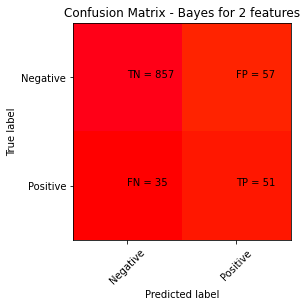

In [49]:
plt.clf()
plt.imshow(bayes_matrix, interpolation='nearest', cmap=plt.cm.hsv)
classNames = ['Negative','Positive']
plt.title('Confusion Matrix - Bayes for 2 features')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(bayes_matrix[i][j]))
plt.show()

In [48]:
bayes_prec_score = bayes_results[2]
print("Bayes precesion score for 2 features: {}%".format((bayes_prec_score*100).round(2)))

Bayes precesion score for 2 features: 47.22%


So the model accuracy and precision scores aren't giving completely conclusive results. As shown from the matrixes above, it is bayes who predicted the most true positives (TP), which is shown in the bottom right of the matrix. To the left of this number, is the false negative (FN- bottom left), which indicates the number of potential customers missed.
Bayes is also producing a lot more false positives (top-right). This would add to the marketing costs but the increase in correct potential customers should outweight this.
Despite the worse accuracy, in this instance it will be better to use Bayes because TP is more important and outweights the FN.